# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [4]:
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [5]:
# load imdb dataset as pandas dataframe
df  = pd.read_csv("imdb_1000.csv")

In [6]:
# show first 5 rows of imdb_df
df[0:5]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [33]:
# load bikes dataset as pandas dataframe
df2 = pd.read_csv("bikes.csv")

In [34]:
# show first 3 rows of bikes_df
df2[0:3]

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [9]:
# list columns of imdb_df
for col in df2.columns:
    print(col)

Date;Rachel / Papineau;Berri1;Maisonneuve_2;Maisonneuve_1;Brébeuf;Parc;PierDup;CSC (Côte Sainte-Catherine);Pont_Jacques_Cartier


In [10]:
# what are the datatypes of values in columns
for col in df2.columns:
    print(type(col))

<class 'str'>


In [11]:
# list first 5 movie titles
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
# show only movie title and genre
df[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [13]:
# show the type of duration column
type(df['duration'])

pandas.core.series.Series

In [14]:
# show duration values of movies as numpy arrays
import numpy as np

a = np.array([df["duration"]])
print(a)

[[142 175 200 152 154  96 161 201 195 139 178 148 124 142 179 169 133 207
  146 121 136 130 130 106 127 116 175 118 110  87 125 112 102 107 119  87
  169 115 112 109 189 110 150 165 155 137 113 165  95 151 155 153 125 130
  116  89 137 117  88 165 170  89 146  99  98 116 156 122 149 134 122 136
  157 123 119 137 128 120 229 107 134 103 177 129 102 216 136  93  68 189
   99 108 113 181 103 138 110 129  88 160 126  91 116 125 143  93 102 132
  153 183 160 120 138 140 153 170 129  81 127 131 172 115 108 107 129 156
   96  91  95 162 130  86 186 151  96 170 118 161 131 126 131 129 224 180
  105 117 140 119 124 130 139 107 132 117 126 122 178 238 149 172  98 116
  116 123 148 123 182  92  93 100 135 105  94 140  83  95  98 143  99  98
  121 163 121 167 188 121 109 110 129 127  94 107 100 117 129 120 121 133
  111 122 101 134 165 138 212 154  89 134  93 114  88 130 101 158  99 108
  124 132 113 131 191 167 130 147 102  88 165 132 118 101 108 174  98  92
   98 106  85 101 105 115 115 124 105 

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [15]:
# convert all the movie titles to uppercase
def func (s):
    s1 = s.upper()
    return s1
df["title"].apply(func)


0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

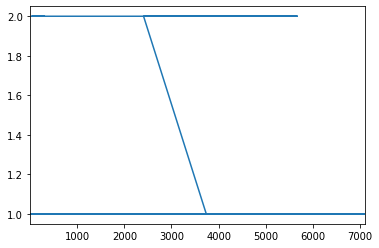

In [35]:
# plot the bikers travelling to Berri1 over the year
pd.value_counts(df2['Berri1']).plot()

C:\Users\Siddhant Gupta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Siddhant Gupta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Siddhant Gupta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Siddhant Gupta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Siddhant Gu

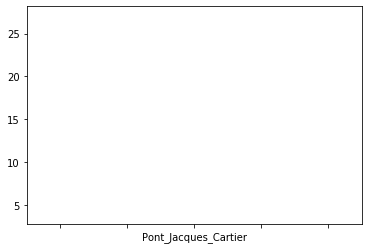

In [40]:
# plot all the columns of bikes_df
for s in df2.columns:
    pd.value_counts(s).plot()

## Value counts

Get count of unique values in a particular column/Series.

In [17]:
# what are the unique genre in imdb_df?
df["genre"].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

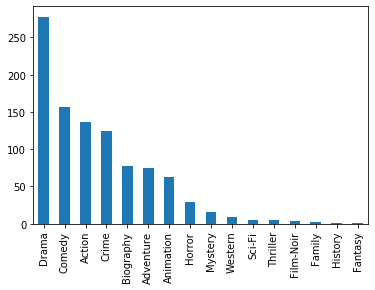

In [18]:
# plotting value counts of unique genres as a bar chart
pd.value_counts(df['genre']).plot.bar()

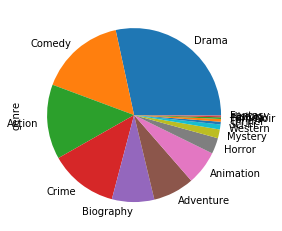

In [25]:
# plotting value counts of unique genres as a pie chart
pd.value_counts(df['genre']).plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [28]:
# show index of bikes_df
df2.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [42]:
# get row for date 2012-01-01
df2.loc["01/01/2012",:]

Date                           00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                            5
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              27
Name: 01/01/2012, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [45]:
# show 11th row of imdb_df using iloc
df.iloc[10]

star_rating                                                     8.8
title             The Lord of the Rings: The Fellowship of the Ring
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [59]:
# select only those movies where genre is adventure
df[df['genre']== 'Adventure']['title']

7          The Lord of the Rings: The Return of the King
10     The Lord of the Rings: The Fellowship of the Ring
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
54                                    Back to the Future
                             ...                        
936                                            True Grit
937                                            Labyrinth
943                                      The Bucket List
953                                The NeverEnding Story
975                          Back to the Future Part III
Name: title, Length: 75, dtype: object

In [60]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
df[df['star_rating'] > 8 & df['duration'] > 130]['genre']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Adding a new column to DataFrame

In [66]:
# add a weekday column to bikes_df
df2['weekday'] = 'yes' 
df2

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0,yes
02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0,yes
03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0,yes
04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0,yes
05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
27/12/2012,00:00,8,12,7,4,NaN,1,2,0,NaN,yes
28/12/2012,00:00,0,35,3,38,NaN,0,0,0,NaN,yes
29/12/2012,00:00,0,27,8,42,NaN,9,0,0,NaN,yes
30/12/2012,00:00,0,5,1,5,NaN,6,0,0,NaN,yes


## Deleting an existing column from DataFrame

In [67]:
# remove column 'Unnamed: 1' from bikes_df
df2.drop('weekday',axis=1,inplace=True)
df2

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...
27/12/2012,00:00,8,12,7,4,NaN,1,2,0,NaN
28/12/2012,00:00,0,35,3,38,NaN,0,0,0,NaN
29/12/2012,00:00,0,27,8,42,NaN,9,0,0,NaN
30/12/2012,00:00,0,5,1,5,NaN,6,0,0,NaN


## Deleting a row in DataFrame

In [68]:
# remove row no. 1 from bikes_df
df.drop(0,axis=0)

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [74]:
# group imdb_df by movie genres
df.groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [75]:
# get crime movies group
gk.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [85]:
# get mean of movie durations for each group
import numpy as np
gk['duration'].agg(np.mean)

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [98]:
# change duration of all movies in a particular genre to mean duration of the group
group = df.groupby('genre')
df['duration'] = group['duration'].agg(np.mean)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,NaN,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,NaN,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,NaN,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,NaN,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,NaN,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,NaN,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,NaN,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [99]:
# drop groups/genres that do not have average movie duration greater than 120.
df[df['duration']>120]

,star_rating,title,content_rating,genre,duration,actors_list


In [ ]:
# group weekday wise bikers count


In [ ]:
# get weekday wise biker count

In [ ]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)